(178, 13)


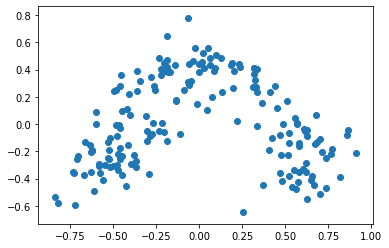

In [2]:
import csv
import sklearn.decomposition
import matplotlib.pyplot as plt
import numpy as np

def main():
    X, attributes = input_data()
    #print(X)
    print(X.shape) #(178,13)
    
    pca_array = normalize(X)
    #print(pca_array) #데이터가 0과 1사이 값으로 정규화됨.
    
    pca, pca_array = run_PCA(X, 2)
    visualize_2d_wine(pca_array)

def input_data():
    X = []
    attributes = []
    
    with open("data/attributes.txt") as fp:
        attributes = fp.readlines()
    attributes = [x.strip() for x in attributes]
    #print(attributes)
    
    csvreader = csv.reader(open("data/wine.csv"))
    for line in csvreader:
        float_line = [float(x) for x in line]
        X.append(float_line)

    return np.array(X), attributes

def run_PCA(X, num_components):
    pca = sklearn.decomposition.PCA(n_components=num_components)
    pca.fit(X) #X라는 데이터를 해당 pca 모델에 집어넣는다.
    pca_array = pca.transform(X) #실제로 데이터를 변환한다.
    
    #print(pca_array) #2차원으로 줄어듦.
    
    return pca, pca_array
    
def normalize(X):
    '''
    각각의 feature에 대해,
    178개의 데이터에 나타나는 해당하는 feature의 값이 최소 0, 최대 1이 되도록
    선형적으로 데이터를 이동시킵니다.
    
    Proline feature같은 경우 1000 이상의 큰 값이기 때문에 PCA 진행 시 주성분이 여기서 발견될 확률이 높음.
    따라서 linear scaling을 하는 것이다.
    '''
    for i in range(X.shape[1]): #X.shape이 (178, 13)이므로 13개의 차원에 대해 진행
        X[:, i] = X[:, i] - np.min(X[:,i]) #최솟값을 뺀다.
        X[:, i] = X[:, i] / np.max(X[:,i]) #최댓값으로 나눈다.

    return X

def visualize_2d_wine(X):
    '''X를 시각화'''
    plt.scatter(X[:,0], X[:,1]) #0번째와 1번째 column의 모든 row를 가져가라.
    plt.savefig("image_pca.png")
.sh
if __name__ == '__main__':
    main()